# IMPORTATION

## Importation des modules

In [2]:
pip install sqldf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# 1. Packages de base

import pandas as pd
import numpy as np
import sqldf as sql

# 2. Packages graphiques

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

# 3. Packages de Machine Learning

from sklearn.linear_model import * # Modèles Linéaires
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import * # Algorithmes ensemblistes type Random Forest

import xgboost as xgb # Algorithme très puissant
from xgboost import XGBClassifier

# Affichage par défaut avec 2 chiffres après la virgule
pd.options.display.float_format = "{:.2f}".format

## Importation des données

In [5]:
SPINE = pd.read_csv("Dataset_spine.csv",sep=',')
SPINE.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.03,22.55,39.61,40.48,98.67,-0.25,0.74,12.57,14.54,15.30,-28.66,43.51,Abnormal,NaN
1,39.06,10.06,25.02,29.00,114.41,4.56,0.42,12.89,17.53,16.78,-25.53,16.11,Abnormal,NaN
2,68.83,22.22,50.09,46.61,105.99,-3.53,0.47,26.83,17.49,16.66,-29.03,19.22,Abnormal,Prediction is done by using binary classificat...
3,69.30,24.65,44.31,44.64,101.87,11.21,0.37,23.56,12.71,11.42,-30.47,18.83,Abnormal,NaN
4,49.71,9.65,28.32,40.06,108.17,7.92,0.54,35.49,15.95,8.87,-16.38,24.92,Abnormal,NaN


In [6]:
SPINE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [7]:
# Number of unique classes in each object column
SPINE.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Class_att       2
Unnamed: 13    14
dtype: int64

#NETTOYAGE DE LA BASE

### Suppression de colonne

In [8]:
#nous avons deux variables de types "object" dont notre variable d'intérêt
#il faudra la convertir

SPINE.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Class_att       2
Unnamed: 13    14
dtype: int64

In [9]:
#on supprime les colonnes indésirables
SPINE.drop('Unnamed: 13',axis=1,inplace=True)
SPINE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


### Renommer les colonnes

In [10]:
SPINE_2= SPINE.rename(columns={"Col1": "pelvic_incidence",
                               "Col2": "pelvic_tilt", 
                               "Col3": "lumbar_lordosis_angle", 
                               "Col4": "sacral_slope",
                               "Col5": "pelvic_radius",
                               "Col6": "degree_spondylolisthesis",
                               "Col7": "pelvic_slope",
                               "Col8": "direct_tilt",
                               "Col9": "thoracic_slope",
                               "Col10": "cervical_tilt",
                               "Col11": "sacrum_angle",
                               "Col12": "scoliosis_slope"})

### Valeurs manquantes

In [11]:
SPINE.isnull().sum()*100/len(SPINE)

Col1        0.00
Col2        0.00
Col3        0.00
Col4        0.00
Col5        0.00
Col6        0.00
Col7        0.00
Col8        0.00
Col9        0.00
Col10       0.00
Col11       0.00
Col12       0.00
Class_att   0.00
dtype: float64

La table est propre, elle n'a aucune valeurs manquantes

###Transformer la variable Class_Att en binaire

In [12]:
SPINE_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [13]:
SPINE_2["Class_att"].unique()

array(['Abnormal', 'Normal'], dtype=object)

La variable Class_att a deux modalités: 

*   la modalité "abnormal" représente les individus souffrant de douleurs lombaires;
*   et la modalité "normal" représente les individus n'ayant pas de douleurs lombaires.

In [14]:
#UNE AUTRE METHODE POUR TRANSFORMER LA VARIABLE BINAIRE
#SPINE_2['Class_att']=SPINE_2['Class_att'].replace({"Abnormal":1, "Normal":0})

#SPINE_2['Class_att'].info()

In [15]:
var_text=['Class_att']

In [16]:
SPINE_3 = pd.get_dummies(data=SPINE_2, columns=var_text)
SPINE_3.drop ('Class_att_Normal',axis=1,inplace=True)

In [17]:
SPINE_3= SPINE_3.rename(columns={"Class_att_Abnormal": "Class_att"})

In [18]:
SPINE_3.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.03,22.55,39.61,40.48,98.67,-0.25,0.74,12.57,14.54,15.30,-28.66,43.51,1
1,39.06,10.06,25.02,29.00,114.41,4.56,0.42,12.89,17.53,16.78,-25.53,16.11,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,0.47,26.83,17.49,16.66,-29.03,19.22,1
3,69.30,24.65,44.31,44.64,101.87,11.21,0.37,23.56,12.71,11.42,-30.47,18.83,1
4,49.71,9.65,28.32,40.06,108.17,7.92,0.54,35.49,15.95,8.87,-16.38,24.92,1


#STATISTIQUES DESCRIPTIVES

###Général

In [19]:
SPINE_3.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.00,60.50,17.24,26.15,46.43,58.69,72.88,129.83
pelvic_tilt,310.00,17.54,10.01,-6.55,10.67,16.36,22.12,49.43
lumbar_lordosis_angle,310.00,51.93,18.55,14.00,37.00,49.56,63.00,125.74
sacral_slope,310.00,42.95,13.42,13.37,33.35,42.40,52.70,121.43
pelvic_radius,310.00,117.92,13.32,70.08,110.71,118.27,125.47,163.07
degree_spondylolisthesis,310.00,26.30,37.56,-11.06,1.60,11.77,41.29,418.54
pelvic_slope,310.00,0.47,0.29,0.00,0.22,0.48,0.70,1.00
direct_tilt,310.00,21.32,8.64,7.03,13.05,21.91,28.95,36.74
thoracic_slope,310.00,13.06,3.40,7.04,10.42,12.94,15.89,19.32
cervical_tilt,310.00,11.93,2.89,7.03,9.54,11.95,14.37,16.82


###Distribution générale

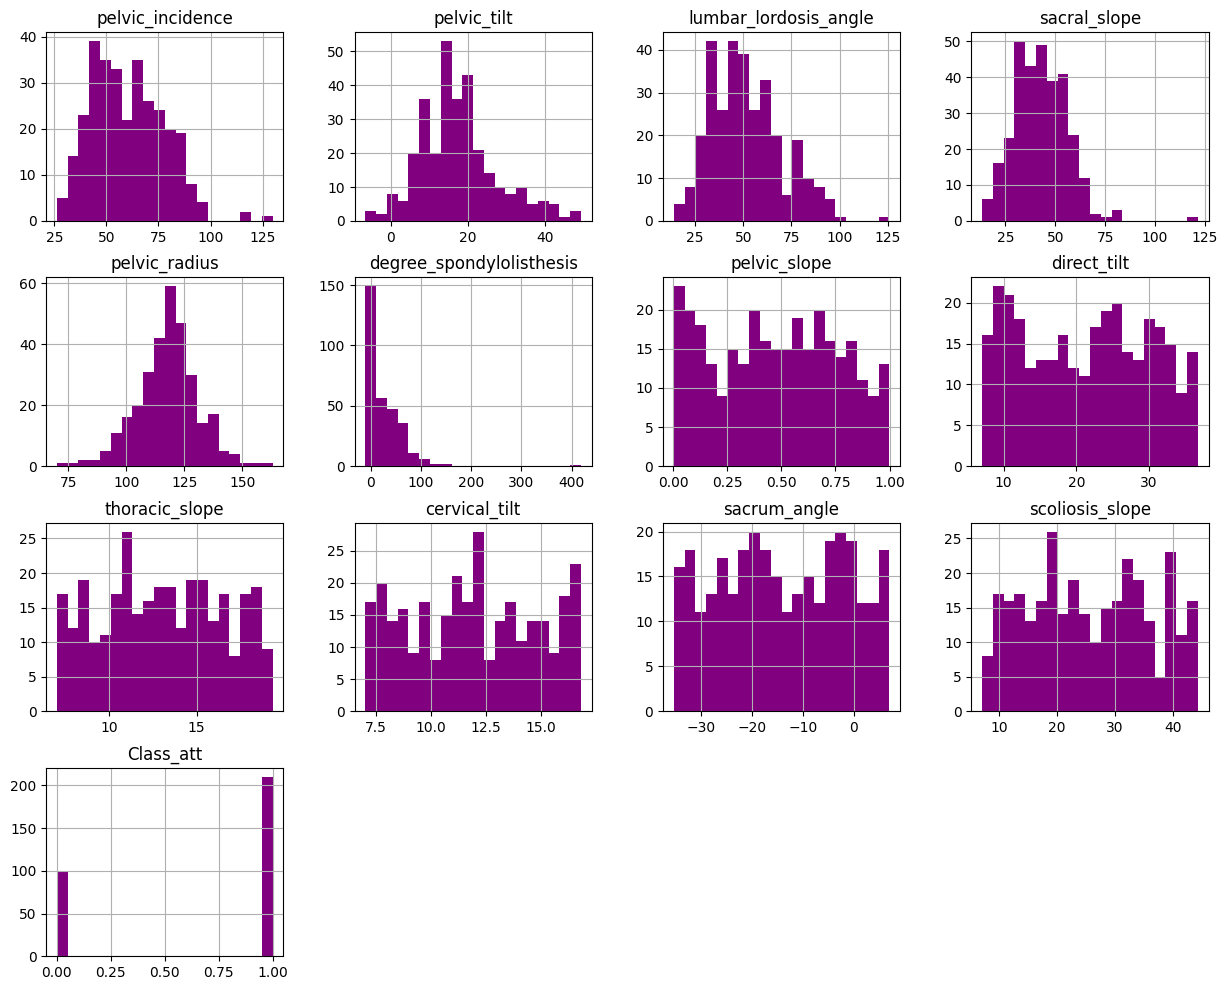

In [20]:
#répartition de toutes nos variables : 

SPINE_3.hist(figsize=(15,12),color='purple', bins = 20)

plt.show()

### Variable Class_att


In [21]:
SPINE_3['Class_att'].value_counts(normalize=True)*100

1   67.74
0   32.26
Name: Class_att, dtype: float64

In [22]:
SPINE_3['Class_att'].value_counts()

1    210
0    100
Name: Class_att, dtype: int64

210 individus ont des douleurs lombaires contre 100 n'ayant pas de douleurs lombaires. L'échantillon a deux fois plus de cas de douleurs lombaires que ceux qui n'en n'ont pas. 

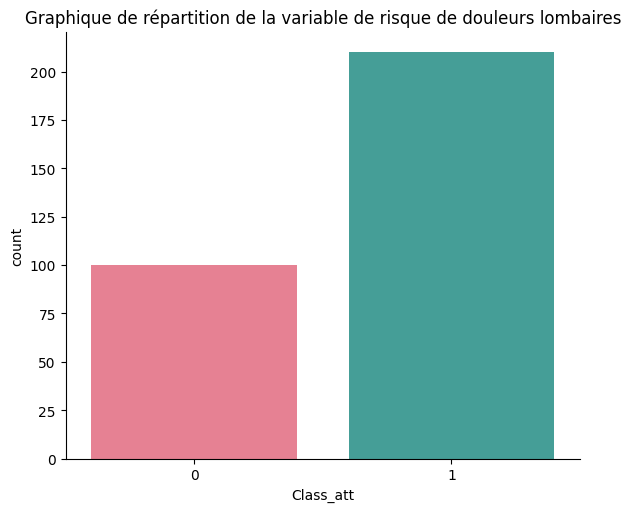

In [23]:
# variable d'intérêt Class_att : 
sns.catplot(SPINE_3,
            x='Class_att' ,
            legend = True,
            kind="count", palette="husl",
            aspect=6/5,).set(title="Graphique de répartition de la variable de risque de douleurs lombaires");

###Analyse des X selon Y

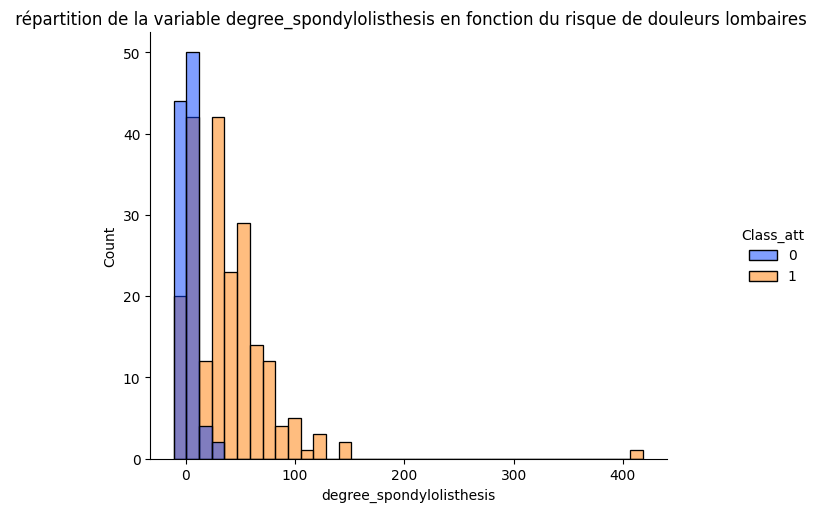

In [24]:
#sans traitement des valeurs extrêmes :

#graphique n° 1 : répartition de notre variable degree_spondylolisthesis en fonction de la variable d'intérêt de douleur lombaires
sns.displot(SPINE_3,
            x='degree_spondylolisthesis',
            hue='Class_att' ,
            palette= "bright",
            aspect=6/5).set(title = " répartition de la variable degree_spondylolisthesis en fonction du risque de douleurs lombaires");


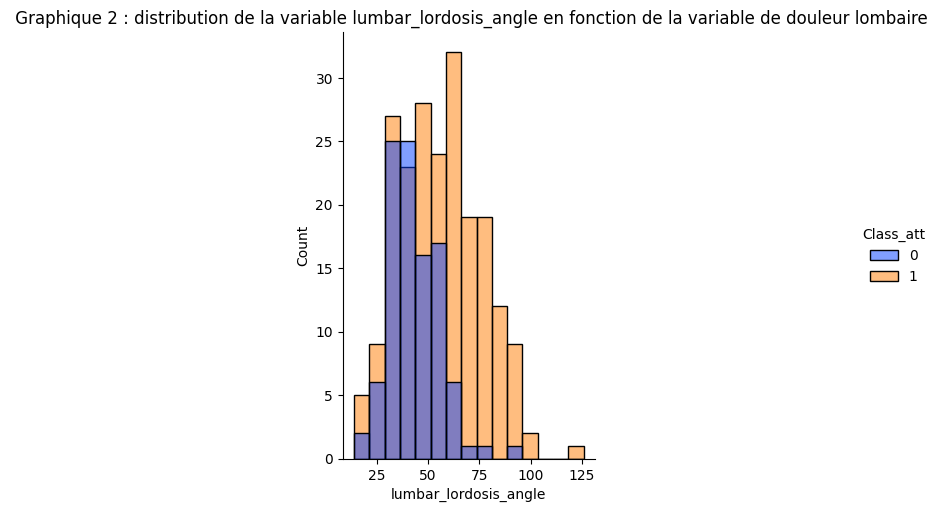

In [25]:
#graphique 2 : répartition de notre variable lumbar_lordosis_angle en fonction de la variable d'intérêt de douleur lombaires :
sns.displot(SPINE_3,
            x='lumbar_lordosis_angle',
            hue='Class_att' ,
            palette = "bright",
            aspect=2/3).set(title = " Graphique 2 : distribution de la variable lumbar_lordosis_angle en fonction de la variable de douleur lombaire");


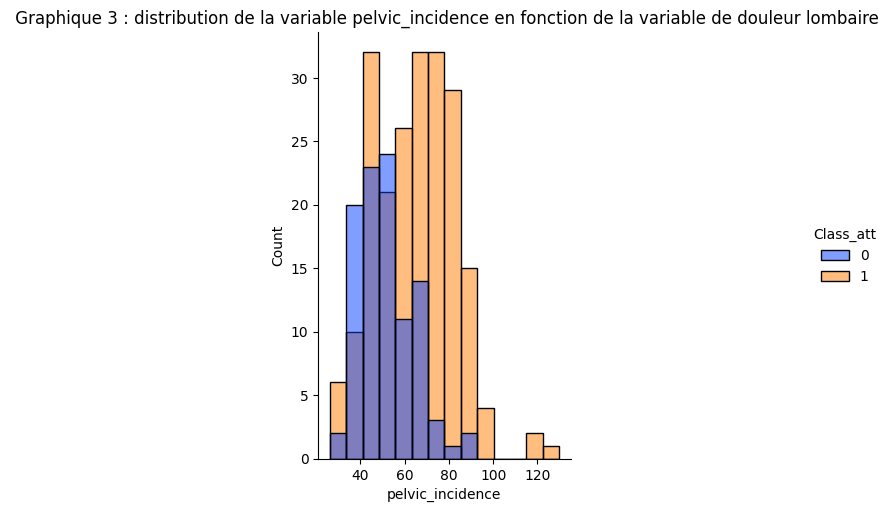

In [26]:
#graphique 3 : répartition de pelvic_incidence en fonction du Y :
sns.displot(SPINE_3,
            x='pelvic_incidence',
            hue='Class_att' ,
            palette = "bright",
            aspect=2/3).set(title = " Graphique 3 : distribution de la variable pelvic_incidence en fonction de la variable de douleur lombaire");

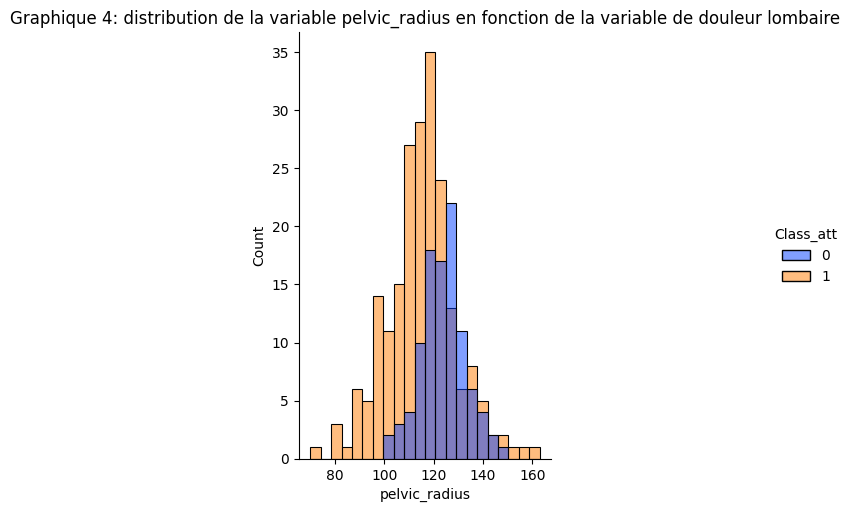

In [27]:
#graphique pelvic_radius :
sns.displot(SPINE_3,
            x='pelvic_radius',
            hue='Class_att' ,
            palette = "bright",
            aspect=2/3).set(title = "Graphique 4: distribution de la variable pelvic_radius en fonction de la variable de douleur lombaire");


<Axes: xlabel='pelvic_radius', ylabel='Count'>

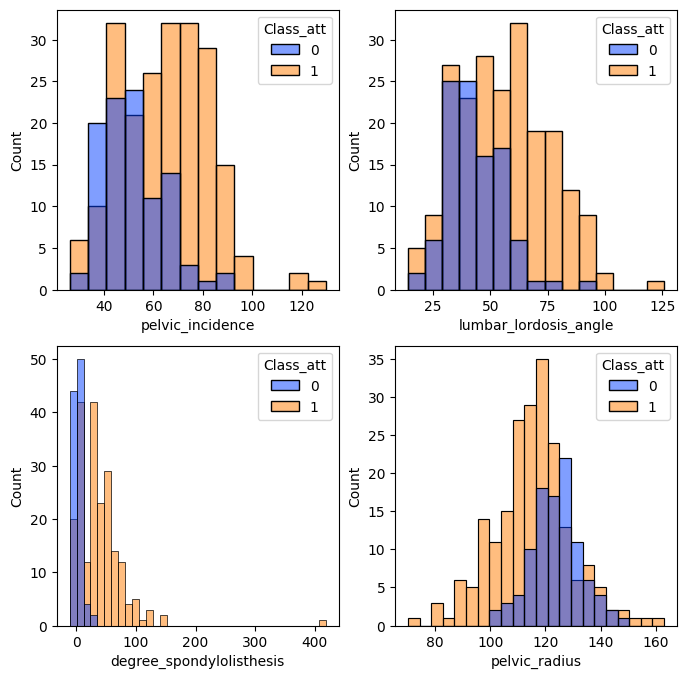

In [28]:
# on peut afficher les 4 nouveaux graphiques ensemble : 

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
# En haut à gauche : 
sns.histplot(SPINE_3, 
             x='pelvic_incidence',
             hue='Class_att' ,
             palette="bright", 
             ax=axs[0, 0])
# En bas à gauche :
sns.histplot(SPINE_3,
             x='degree_spondylolisthesis',
             hue='Class_att' ,
             palette="bright",
             ax=axs[1, 0]) 
# En haut à droite : 
sns.histplot(SPINE_3, 
             x='lumbar_lordosis_angle',
             hue='Class_att' ,
             palette="bright",
             ax=axs[0, 1])
# En bas à droite :
sns.histplot(SPINE_3,
             x='pelvic_radius',
             hue='Class_att' ,
             palette="bright",
             ax=axs[1, 1]) 


### Potentiels valeurs extrèmes


#### pelvic_incidence

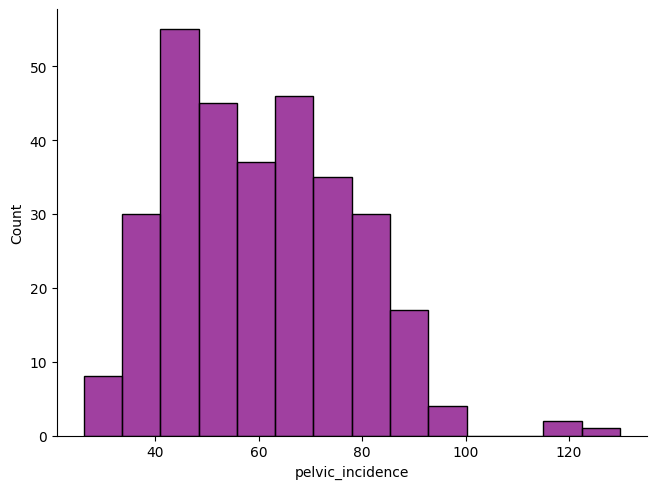

In [29]:
sns.displot(SPINE_3,
            x='pelvic_incidence',
            color ='purple',
            aspect=8/6);

In [30]:
# nous pouvons compter le nombre d'observations allant au-delà de 100 et constituant des valeurs extrêmes
len(SPINE_3.query("pelvic_incidence>100"))


3

<Axes: xlabel='pelvic_incidence'>

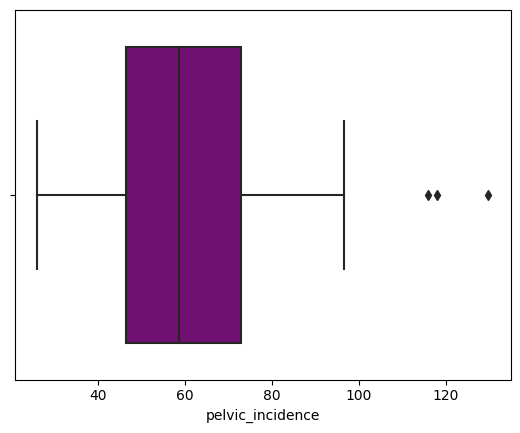

In [31]:
sns.boxplot(x=SPINE_3['pelvic_incidence'],color ='purple')

####lumbar_lordosis_angle

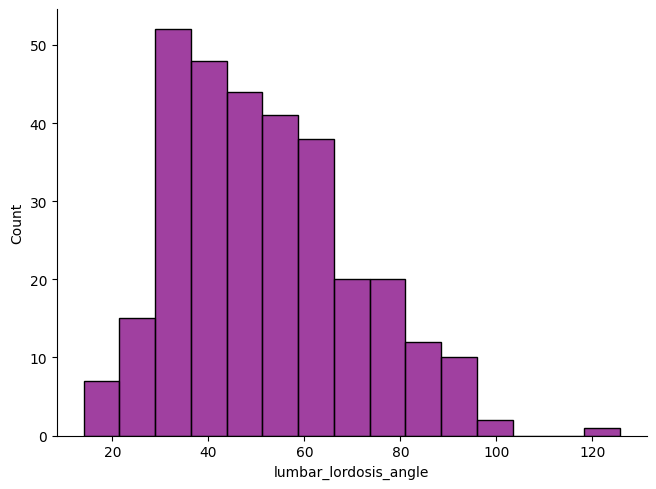

In [32]:
sns.displot(SPINE_3,
            x='lumbar_lordosis_angle',
            color ='purple',
            aspect=8/6);

In [33]:
len(SPINE_3.query("lumbar_lordosis_angle>115"))

1

<Axes: xlabel='lumbar_lordosis_angle'>

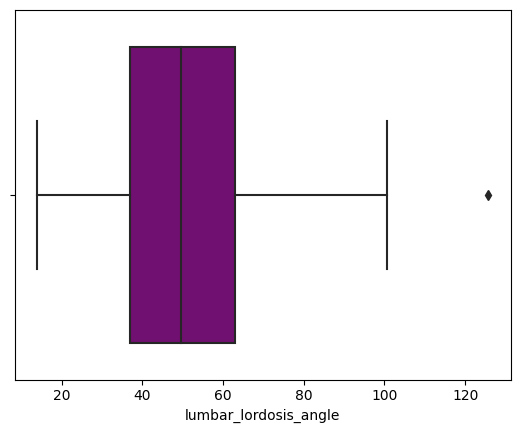

In [34]:
sns.boxplot(x=SPINE_3['lumbar_lordosis_angle'],color ='purple')

####sacral_slope

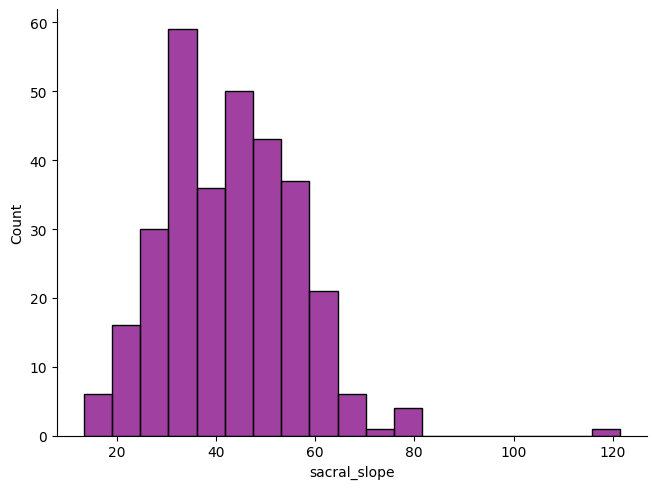

In [35]:
sns.displot(SPINE_3,
            x='sacral_slope',
            color ='purple',
            aspect=8/6);

In [36]:
len(SPINE_3.query("sacral_slope>78"))

4

In [37]:
len(SPINE_3.query("sacral_slope>=80"))

1

<Axes: xlabel='sacral_slope'>

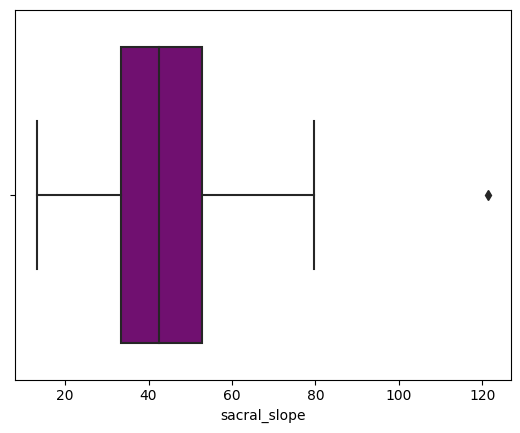

In [38]:
sns.boxplot(x=SPINE_3['sacral_slope'],color ='purple')

####degree_spondylolisthesis

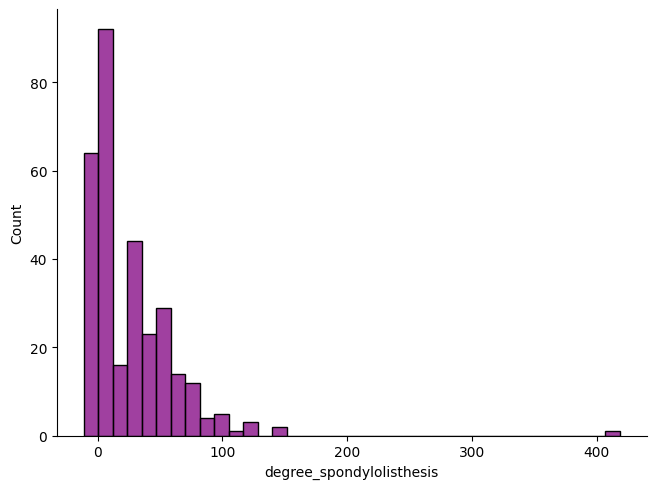

In [39]:
sns.displot(SPINE_3,
            x='degree_spondylolisthesis',
            color ='purple',
            aspect=8/6);

In [40]:
len(SPINE_3.query("degree_spondylolisthesis>124")) 

4

<Axes: xlabel='degree_spondylolisthesis'>

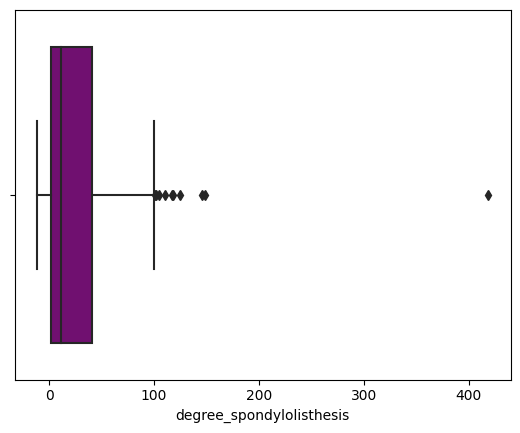

In [41]:
sns.boxplot(x=SPINE_3["degree_spondylolisthesis"],color ='purple')

#### pelvic_radius

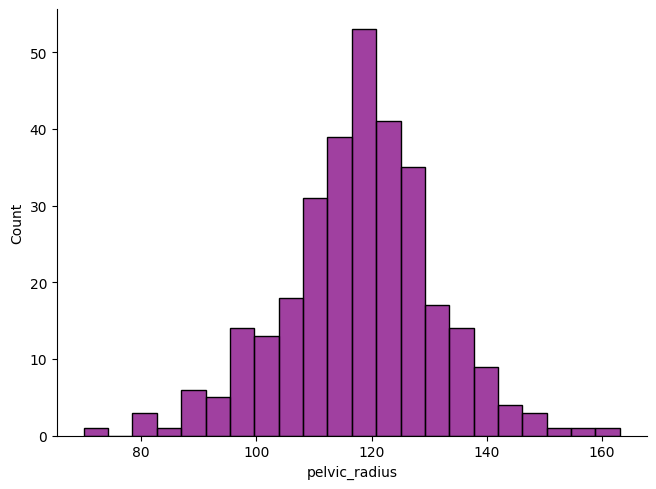

In [42]:
sns.displot(SPINE_3,
            x='pelvic_radius',
            color ='purple',
            aspect=8/6);

In [43]:
np.quantile(SPINE_3[['pelvic_radius']],.99)

148.46877913200004

<Axes: xlabel='pelvic_radius'>

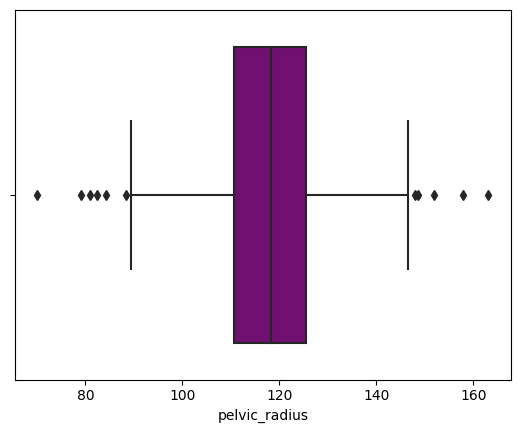

In [44]:
sns.boxplot(x=SPINE_3["pelvic_radius"],color ='purple')

#### Statistiques quantiles pour les valeurs extrèmes:

In [45]:
percentile_99 = SPINE_3.quantile(0.99)
percentile_99

pelvic_incidence            96.55
pelvic_tilt                 46.20
lumbar_lordosis_angle       95.04
sacral_slope                78.30
pelvic_radius              148.47
degree_spondylolisthesis   124.39
pelvic_slope                 0.99
direct_tilt                 36.34
thoracic_slope              19.18
cervical_tilt               16.74
sacrum_angle                 6.53
scoliosis_slope             43.87
Class_att                    1.00
Name: 0.99, dtype: float64

In [46]:
max=SPINE_3.max()
max

pelvic_incidence           129.83
pelvic_tilt                 49.43
lumbar_lordosis_angle      125.74
sacral_slope               121.43
pelvic_radius              163.07
degree_spondylolisthesis   418.54
pelvic_slope                 1.00
direct_tilt                 36.74
thoracic_slope              19.32
cervical_tilt               16.82
sacrum_angle                 6.97
scoliosis_slope             44.34
Class_att                    1.00
dtype: float64

In [47]:
#nous faisons la différence pour mieux observer la présence de valeurs extrêmes
max-percentile_99

pelvic_incidence            33.28
pelvic_tilt                  3.23
lumbar_lordosis_angle       30.70
sacral_slope                43.13
pelvic_radius               14.60
degree_spondylolisthesis   294.16
pelvic_slope                 0.01
direct_tilt                  0.41
thoracic_slope               0.14
cervical_tilt                0.08
sacrum_angle                 0.44
scoliosis_slope              0.47
Class_att                    0.00
dtype: float64

In [48]:
# créatio d'une table sans les valeurs extrêmes 

SPINE_test = sql.run("""
        Select *
        from SPINE_3
        where degree_spondylolisthesis <= 124 and 
              pelvic_incidence <= 100 and 
              sacral_slope <= 80 and
              lumbar_lordosis_angle <= 100
        """)

# nous avons décidé de ne pas "corriger" la variable pelvic_radius
#car la distribution en cloche semble correcte et les valeurs au max
#ne semblent pas être des valeurs aberrantes ou des erreurs
#alors que pour les autres variables, les valeurs max se démarquent clairement des autres 
#d'après ce qu'on voit sur les graphiques 

# si on utilise SQL et non un query, on a besoin de supprimer la colonne index
SPINE_test=SPINE_test.drop('index',axis=1)

SPINE_test.describe().T
#on a bien supprimer les valeurs extrêmes et la colonne index

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,302.00,59.75,16.25,26.15,46.38,57.70,72.31,96.66
pelvic_tilt,302.00,17.19,9.75,-6.55,10.57,16.02,21.65,49.43
lumbar_lordosis_angle,302.00,51.36,17.98,14.00,36.68,48.85,62.68,96.28
sacral_slope,302.00,42.56,12.27,13.37,33.38,42.40,52.19,78.79
pelvic_radius,302.00,117.81,12.95,70.08,110.89,118.27,125.38,163.07
degree_spondylolisthesis,302.00,23.12,27.37,-11.06,1.53,10.64,39.38,118.35
pelvic_slope,302.00,0.47,0.29,0.00,0.22,0.47,0.70,1.00
direct_tilt,302.00,21.34,8.62,7.03,13.19,21.98,28.95,36.74
thoracic_slope,302.00,13.12,3.41,7.04,10.44,13.08,15.96,19.32
cervical_tilt,302.00,11.95,2.91,7.03,9.52,11.96,14.38,16.82


###Analyse des corrélations

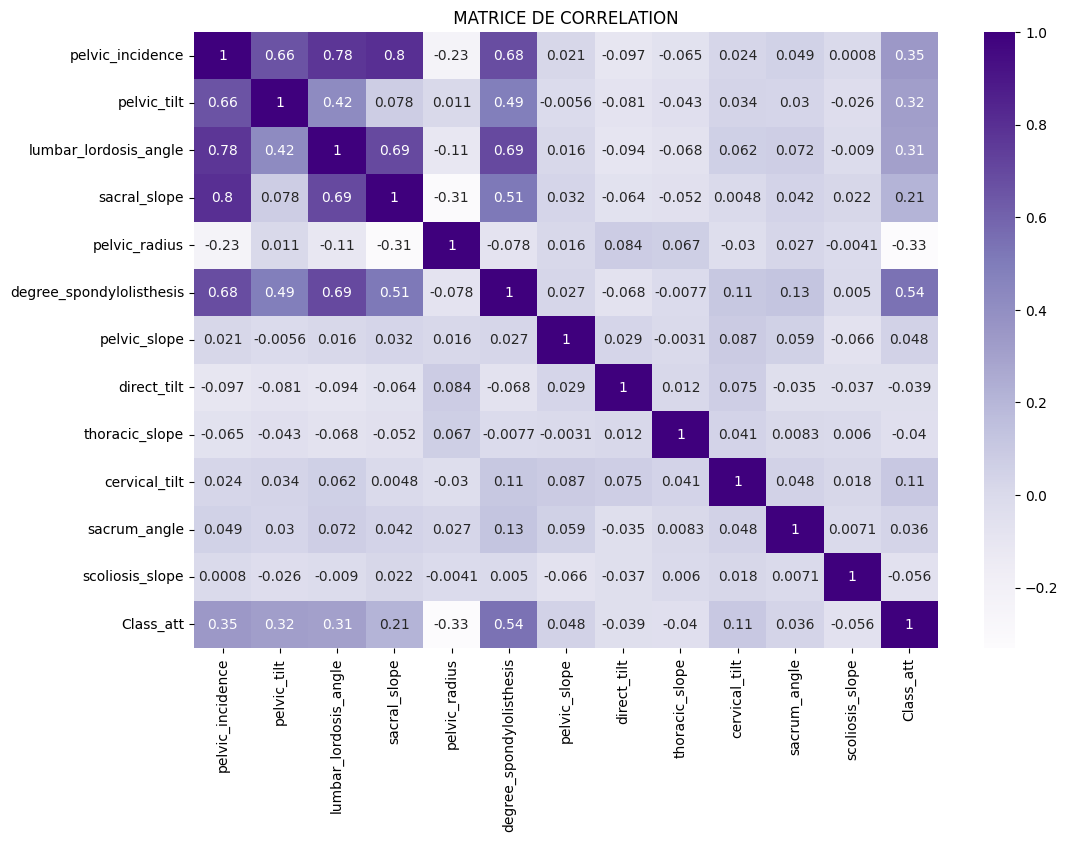

In [49]:
corr = SPINE_test.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap = 'Purples', annot= True).set(title = " MATRICE DE CORRELATION ");


In [50]:
SPINE_test.corr()['Class_att'].sort_values(ascending=False) *100

Class_att                  100.00
degree_spondylolisthesis    53.91
pelvic_incidence            34.96
pelvic_tilt                 31.59
lumbar_lordosis_angle       30.63
sacral_slope                21.22
cervical_tilt               10.58
pelvic_slope                 4.83
sacrum_angle                 3.63
direct_tilt                 -3.88
thoracic_slope              -3.96
scoliosis_slope             -5.65
pelvic_radius              -33.06
Name: Class_att, dtype: float64

#MODELISATION & COMPARAISON

---



## TABLE DE RESULTATS FINALE (TEST3)

#### TEST 3 No valeurs extrêmes degree_spondylolisthesis, pelvic incidence, sacral slope et lumbar_lordosis_angle

In [51]:
TEST3=SPINE_3.query("degree_spondylolisthesis<124 and pelvic_incidence<100 and sacral_slope<=80 and lumbar_lordosis_angle <= 100")

######RANDOM FOREST

---



######Analyse du modèle

La base TRAIN à les dimensions suivantes : (211, 12)
La base TEST à les dimensions suivantes : (91, 12)
-------------------------------------------
Résultats du Random Forest
 
Accuracy: 0.78
Recall: 0.85
Precision: 0.83
AUC : 0.74
-------------------------------------------


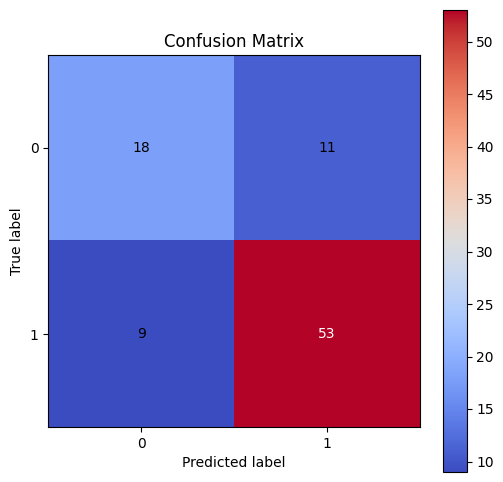

In [52]:
# Préparer un échantillon Train et Test

X = TEST3.drop('Class_att',axis=1) # Variables Indépendantes
Y = TEST3['Class_att'] # Variable Dépendante

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.3, random_state=123)

print ('La base TRAIN à les dimensions suivantes :',X_TRAIN.shape)
print ('La base TEST à les dimensions suivantes :',X_TEST.shape) ;

# 1.Création du modèle
Random_F = RandomForestClassifier(criterion='gini', random_state=123 ,n_estimators=400)
Random_F.fit(X_TRAIN, Y_TRAIN)

# 2.Prédictions
Y_PRED = Random_F.predict(X_TEST)

# 3.Matrice de Confusion 

skplt.metrics.plot_confusion_matrix( Y_TEST, Y_PRED, figsize=(6,6),cmap='coolwarm' ) 

 # Analyse du modèle 
print('-------------------------------------------')
print('Résultats du Random Forest')
print(' ')
print('Accuracy: %.2f'% accuracy_score(Y_TEST,Y_PRED))
print('Recall: %.2f'% recall_score(Y_TEST,Y_PRED))
print('Precision: %.2f'% precision_score(Y_TEST,Y_PRED))
print('AUC : %.2f'% roc_auc_score(Y_TEST,Y_PRED))
print('-------------------------------------------')  

######Courbe AUC & ROC

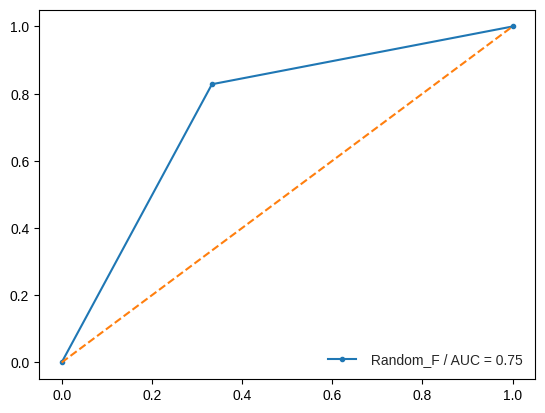

In [53]:
Random_F_fpr , Random_F_tpr , thresold = roc_curve(Y_PRED , Y_TEST )
auc_Random_F = auc(Random_F_fpr ,Random_F_tpr )

plt.plot(Random_F_fpr , Random_F_tpr , marker='.' , label = ' Random_F / AUC = %0.2f' % auc_Random_F ) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc='lower right');

######Courbe de gains

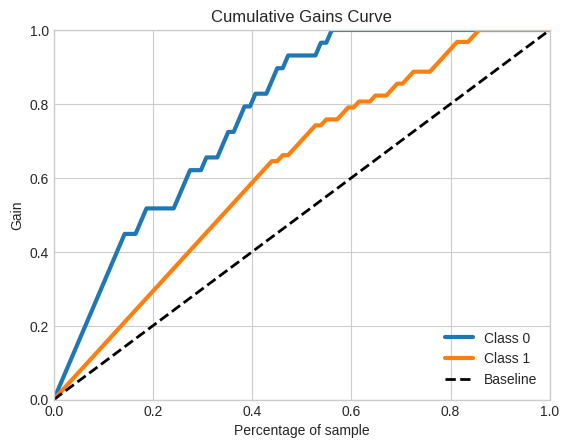

In [54]:
Y_PROB = Random_F.predict_proba(X_TEST)
skplt.metrics.plot_cumulative_gain(Y_TEST, Y_PROB) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.show() ;

######XGBOOST

---



######Analyse du modèle et matrice de confusion

La base TRAIN à les dimensions suivantes : (211, 12)
La base TEST à les dimensions suivantes : (91, 12)
-------------------------------------------
Résultats du XGBoost
 
Accuracy: 0.80
Recall: 0.85
Precision: 0.85
AUC : 0.78
-------------------------------------------


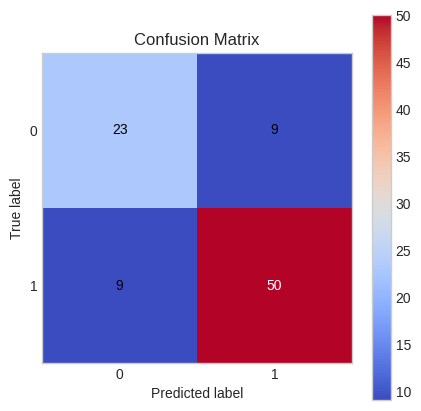

In [55]:
# Préparer un échantillon Train et Test

X = TEST3.drop('Class_att',axis=1) # Variables Indépendantes
Y = TEST3['Class_att'] # Variable Dépendante

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.3, random_state=963)

print ('La base TRAIN à les dimensions suivantes :',X_TRAIN.shape)
print ('La base TEST à les dimensions suivantes :',X_TEST.shape) ;

# 1.Création du modèle
XGB = XGBClassifier( n_estimators=500 , objective='binary:logistic', random_state=123)
XGB.fit(X_TRAIN, Y_TRAIN)

# 2.Prédictions
Y_PRED = XGB.predict(X_TEST)

# 3.Matrice de Confusion 

skplt.metrics.plot_confusion_matrix( Y_TEST, Y_PRED, figsize=(5,5),cmap='coolwarm' ) 

 # Analyse du modèle 
print('-------------------------------------------')
print('Résultats du XGBoost')
print(' ')
print('Accuracy: %.2f'% accuracy_score(Y_TEST,Y_PRED))
print('Recall: %.2f'% recall_score(Y_TEST,Y_PRED))
print('Precision: %.2f'% precision_score(Y_TEST,Y_PRED))
print('AUC : %.2f'% roc_auc_score(Y_TEST,Y_PRED))
print('-------------------------------------------')  

######Courbe AUC & ROC

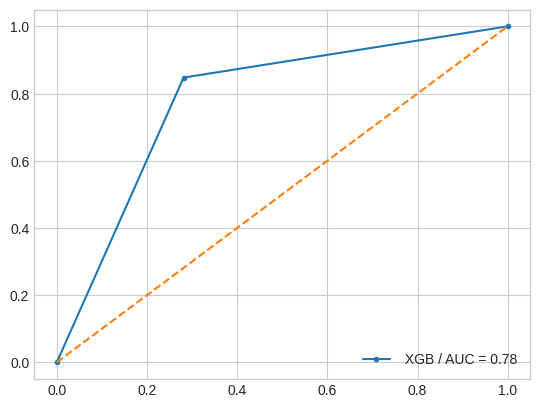

In [56]:
XGB_fpr , XGB_tpr , thresold = roc_curve(Y_PRED , Y_TEST )
auc_XGB = auc(XGB_fpr ,XGB_tpr )

plt.plot(XGB_fpr , XGB_tpr , marker='.' , label = ' XGB / AUC = %0.2f' % auc_XGB )
plt.style.use('seaborn-v0_8-whitegrid') 
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc='lower right');

######Courbe de gains

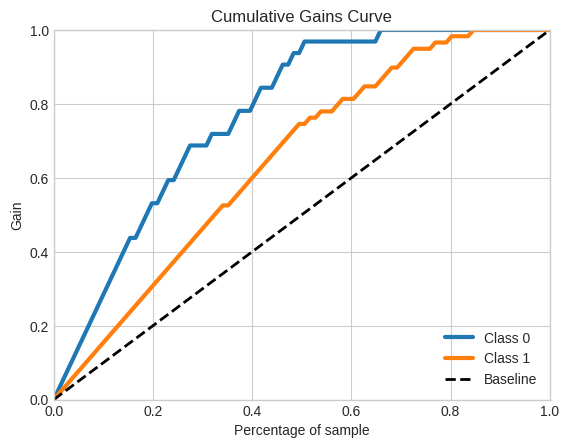

In [57]:
Y_PROB = XGB.predict_proba(X_TEST)
skplt.metrics.plot_cumulative_gain(Y_TEST, Y_PROB) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.show() ;

###Comparaison des modèles (AUC)

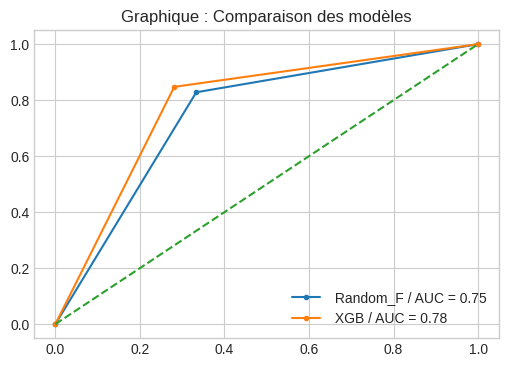

In [58]:
plt.figure(figsize=(6,4), dpi=100)

plt.plot(Random_F_fpr , Random_F_tpr , marker='.' , label = ' Random_F / AUC = %0.2f' % auc_Random_F ) 

plt.plot(XGB_fpr , XGB_tpr , marker='.' , label = ' XGB / AUC = %0.2f' % auc_XGB ) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.title('Graphique : Comparaison des modèles')
plt.legend(loc='lower right')
plt.show();

## PARTIE SUPPLEMENTAIRE pour test : 


---



###Sans modifications de la table (valeurs extrêmes)

#####XGBOOST

La base TRAIN à les dimensions suivantes : (217, 12)
La base TEST à les dimensions suivantes : (93, 12)
-------------------------------------------
Résultats du XGBoost
 
Accuracy: 0.84
Recall: 0.91
Precision: 0.87
AUC : 0.79
-------------------------------------------


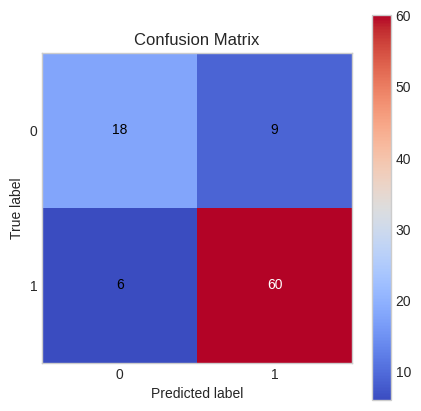

In [59]:
# Préparer un échantillon Train et Test

X = SPINE_3.drop('Class_att',axis=1) # Variables Indépendantes
Y = SPINE_3['Class_att'] # Variable Dépendante

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.3, random_state=963)

print ('La base TRAIN à les dimensions suivantes :',X_TRAIN.shape)
print ('La base TEST à les dimensions suivantes :',X_TEST.shape) ;

# 1.Création du modèle
XGB = XGBClassifier( n_estimators=500 , objective='binary:logistic', random_state=123)
XGB.fit(X_TRAIN, Y_TRAIN)

# 2.Prédictions
Y_PRED = XGB.predict(X_TEST)

# 3.Matrice de Confusion 

skplt.metrics.plot_confusion_matrix( Y_TEST, Y_PRED, figsize=(5,5),cmap='coolwarm' ) 

 # Analyse du modèle 
print('-------------------------------------------')
print('Résultats du XGBoost')
print(' ')
print('Accuracy: %.2f'% accuracy_score(Y_TEST,Y_PRED))
print('Recall: %.2f'% recall_score(Y_TEST,Y_PRED))
print('Precision: %.2f'% precision_score(Y_TEST,Y_PRED))
print('AUC : %.2f'% roc_auc_score(Y_TEST,Y_PRED))
print('-------------------------------------------')  

######Courbe ROC & AUC


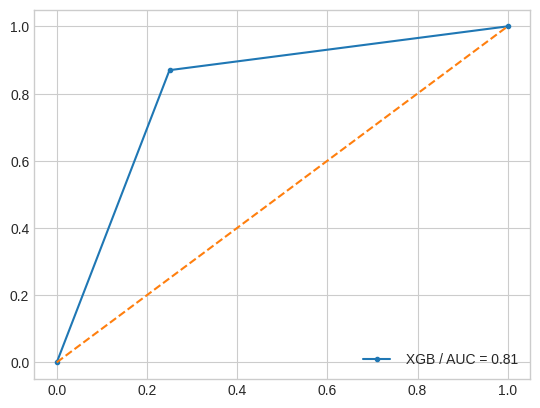

In [60]:
XGB_fpr , XGB_tpr , thresold = roc_curve(Y_PRED , Y_TEST )
auc_XGB = auc(XGB_fpr ,XGB_tpr )

plt.plot(XGB_fpr , XGB_tpr , marker='.' , label = ' XGB / AUC = %0.2f' % auc_XGB ) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc='lower right');

######Courbe de gains cumulés

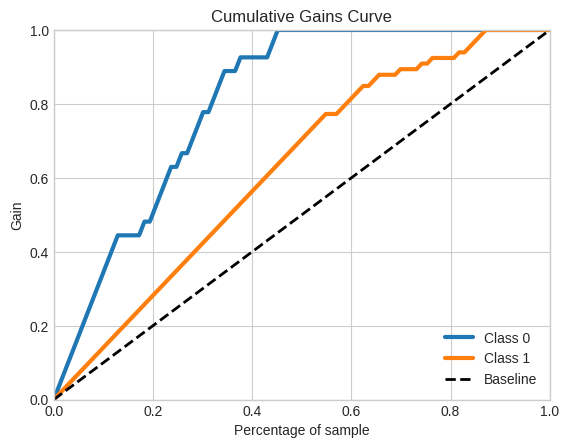

In [61]:
Y_PROB = XGB.predict_proba(X_TEST)
skplt.metrics.plot_cumulative_gain(Y_TEST, Y_PROB) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.show() ;

La base TRAIN à les dimensions suivantes : (217, 12)
La base TEST à les dimensions suivantes : (93, 12)
-------------------------------------------
Résultats du Random Forest
 
Accuracy: 0.81
Recall: 0.88
Precision: 0.85
AUC : 0.76
-------------------------------------------


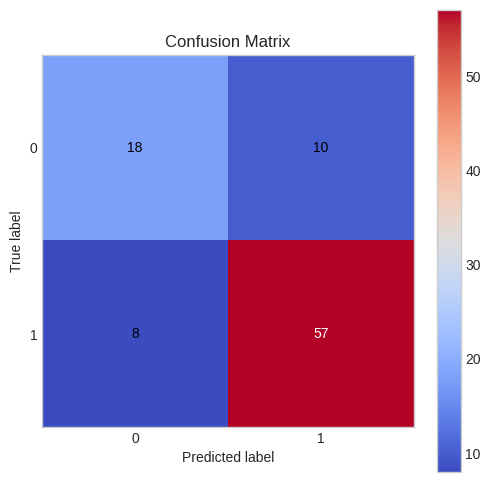

In [62]:
# Préparer un échantillon Train et Test

X = SPINE_3.drop('Class_att',axis=1) # Variables Indépendantes
Y = SPINE_3['Class_att'] # Variable Dépendante

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.3, random_state=123)

print ('La base TRAIN à les dimensions suivantes :',X_TRAIN.shape)
print ('La base TEST à les dimensions suivantes :',X_TEST.shape) ;

# 1.Création du modèle
Random_F = RandomForestClassifier(criterion='gini', random_state=123 ,n_estimators=400)
Random_F.fit(X_TRAIN, Y_TRAIN)

# 2.Prédictions
Y_PRED = Random_F.predict(X_TEST)

# 3.Matrice de Confusion 

skplt.metrics.plot_confusion_matrix( Y_TEST, Y_PRED, figsize=(6,6),cmap='coolwarm' ) 

 # Analyse du modèle 
print('-------------------------------------------')
print('Résultats du Random Forest')
print(' ')
print('Accuracy: %.2f'% accuracy_score(Y_TEST,Y_PRED))
print('Recall: %.2f'% recall_score(Y_TEST,Y_PRED))
print('Precision: %.2f'% precision_score(Y_TEST,Y_PRED))
print('AUC : %.2f'% roc_auc_score(Y_TEST,Y_PRED))
print('-------------------------------------------')  

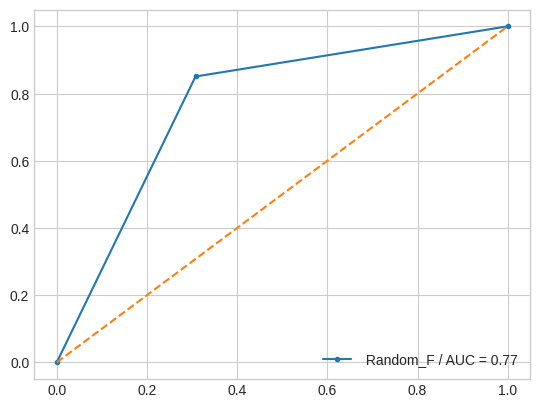

In [63]:
Random_F_fpr , Random_F_tpr , thresold = roc_curve(Y_PRED , Y_TEST )
auc_Random_F = auc(Random_F_fpr ,Random_F_tpr )

plt.plot(Random_F_fpr , Random_F_tpr , marker='.' , label = ' Random_F / AUC = %0.2f' % auc_Random_F ) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc='lower right');

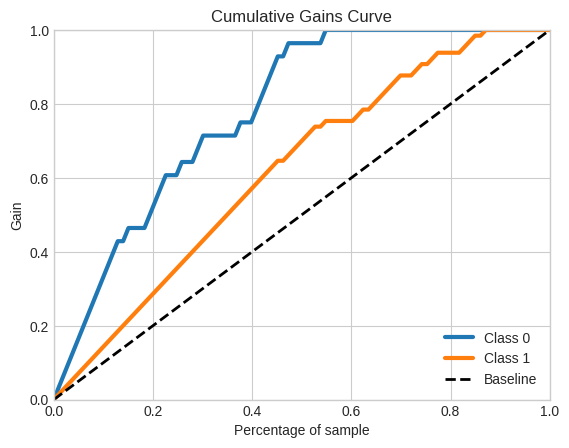

In [64]:
Y_PROB = Random_F.predict_proba(X_TEST)
skplt.metrics.plot_cumulative_gain(Y_TEST, Y_PROB) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.show() ;

#####Régression logistique

In [65]:
# Préparer un échantillon Train et Test

X = SPINE_3.drop('Class_att',axis=1) # Variables Indépendantes
Y = SPINE_3['Class_att'] # Variable Dépendante

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.3, random_state=123)

print ('La base TRAIN à les dimensions suivantes :',X_TRAIN.shape)
print ('La base TEST à les dimensions suivantes :',X_TEST.shape) ;

La base TRAIN à les dimensions suivantes : (217, 12)
La base TEST à les dimensions suivantes : (93, 12)


In [66]:
# 1.Création du modèle
Log_Reg = LogisticRegression(max_iter=1000)  
Log_Reg.fit(X_TRAIN, Y_TRAIN)

# 2.Prédictions
Y_PRED = Log_Reg.predict(X_TEST)

######Matrice de confusion

-----------------------------------------
Résultats de la Régression Logistique
 
Accuracy: 0.84
Recall: 0.85
Precision: 0.92
AUC : 0.83
-----------------------------------------


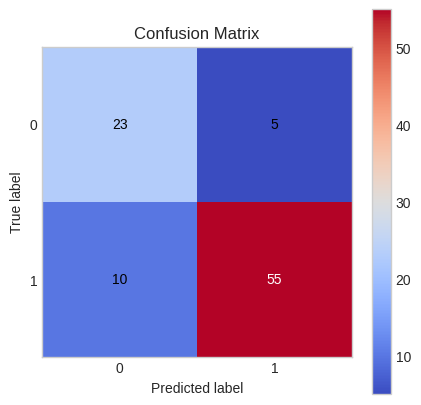

In [67]:
skplt.metrics.plot_confusion_matrix( Y_TEST, Y_PRED, figsize=(5,5),cmap='coolwarm' ) 

 # 3. Analyse du modèle 
print('-----------------------------------------')
print('Résultats de la Régression Logistique')
print(' ')
print('Accuracy: %.2f'% accuracy_score(Y_TEST , Y_PRED))
print('Recall: %.2f'% recall_score(Y_TEST , Y_PRED))
print('Precision: %.2f'% precision_score(Y_TEST , Y_PRED))
print('AUC : %.2f'% roc_auc_score(Y_TEST , Y_PRED))
print('-----------------------------------------')   

###### Courbe ROC & AUC

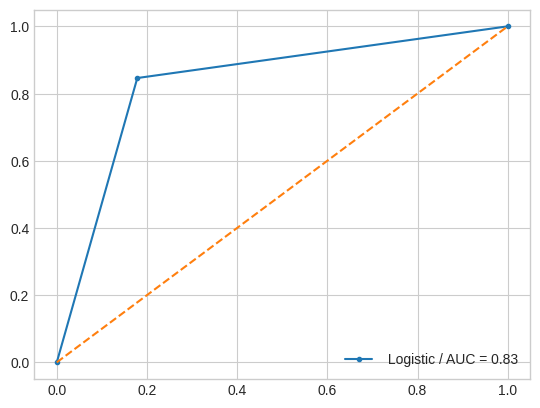

In [68]:
Log_Reg_fpr , Log_Reg_tpr , thresold = roc_curve( Y_TEST,Y_PRED )
auc_Log_Reg = auc(Log_Reg_fpr ,Log_Reg_tpr )

plt.plot(Log_Reg_fpr , Log_Reg_tpr , marker='.' , label = ' Logistic / AUC = %0.2f' % auc_Log_Reg ) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc='lower right');

######Courbe de gains cumulés

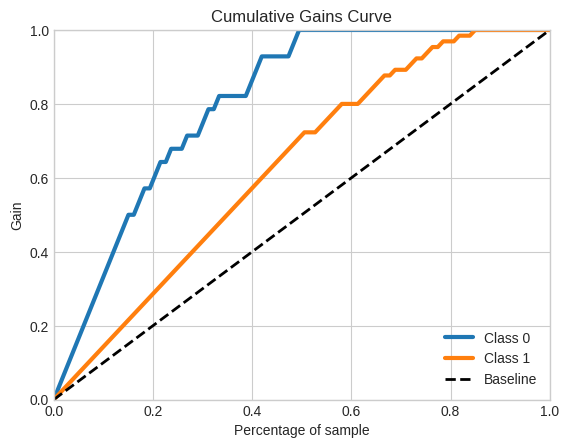

In [69]:
Y_PROB = Log_Reg.predict_proba(X_TEST)
skplt.metrics.plot_cumulative_gain(Y_TEST, Y_PROB) 
plt.style.use('bmh')
plt.show() ;

#####RANDOM FOREST

######ANALYSE ET MATRICE DE CONFUSION

La base TRAIN à les dimensions suivantes : (217, 12)
La base TEST à les dimensions suivantes : (93, 12)
-------------------------------------------
Résultats du Random Forest
 
Accuracy: 0.81
Recall: 0.88
Precision: 0.85
AUC : 0.76
-------------------------------------------


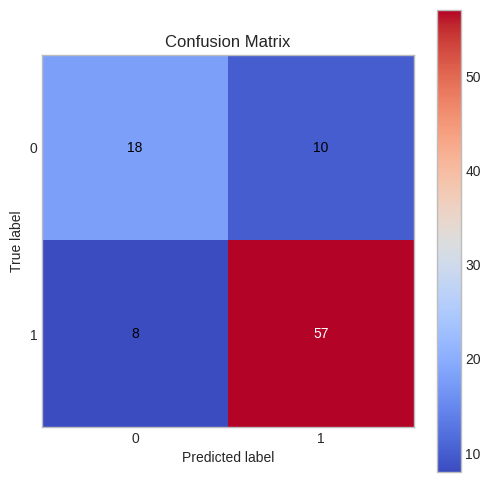

In [70]:
# Préparer un échantillon Train et Test

X = SPINE_3.drop('Class_att',axis=1) # Variables Indépendantes
Y = SPINE_3['Class_att'] # Variable Dépendante

X_TRAIN,X_TEST,Y_TRAIN,Y_TEST = train_test_split(X,Y,test_size=0.3, random_state=123)

print ('La base TRAIN à les dimensions suivantes :',X_TRAIN.shape)
print ('La base TEST à les dimensions suivantes :',X_TEST.shape) ;

# 1.Création du modèle
Random_F = RandomForestClassifier(criterion='gini', random_state=123 ,n_estimators=400)
Random_F.fit(X_TRAIN, Y_TRAIN)

# 2.Prédictions
Y_PRED = Random_F.predict(X_TEST)

# 3.Matrice de Confusion 

skplt.metrics.plot_confusion_matrix( Y_TEST, Y_PRED, figsize=(6,6),cmap='coolwarm' ) 

 # Analyse du modèle 
print('-------------------------------------------')
print('Résultats du Random Forest')
print(' ')
print('Accuracy: %.2f'% accuracy_score(Y_TEST,Y_PRED))
print('Recall: %.2f'% recall_score(Y_TEST,Y_PRED))
print('Precision: %.2f'% precision_score(Y_TEST,Y_PRED))
print('AUC : %.2f'% roc_auc_score(Y_TEST,Y_PRED))
print('-------------------------------------------')  

######COURBE ROC & AUC

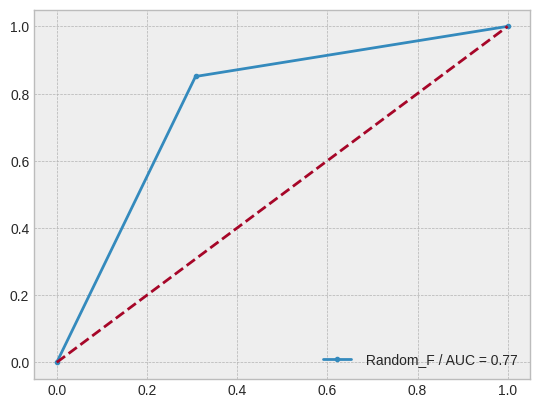

In [71]:
Random_F_fpr , Random_F_tpr , thresold = roc_curve(Y_PRED , Y_TEST )
auc_Random_F = auc(Random_F_fpr ,Random_F_tpr )



plt.plot(Random_F_fpr , Random_F_tpr , marker='.' , label = ' Random_F / AUC = %0.2f' % auc_Random_F ) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.legend(loc='lower right');

In [72]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

######COURBE DE GAINS

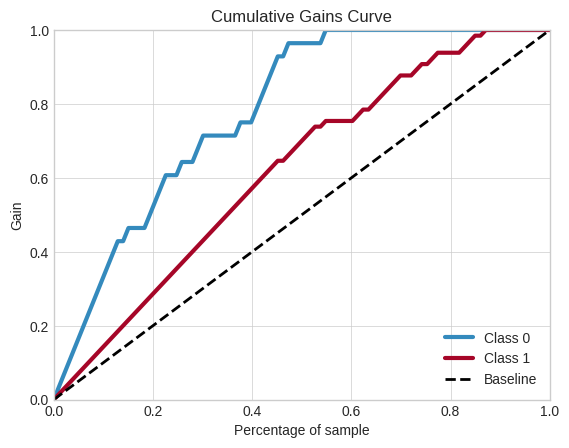

In [73]:
Y_PROB = Random_F.predict_proba(X_TEST)
skplt.metrics.plot_cumulative_gain(Y_TEST, Y_PROB) 
plt.style.use('seaborn-v0_8-whitegrid')
plt.show() ;

###Comparaison des modèles (AUC)

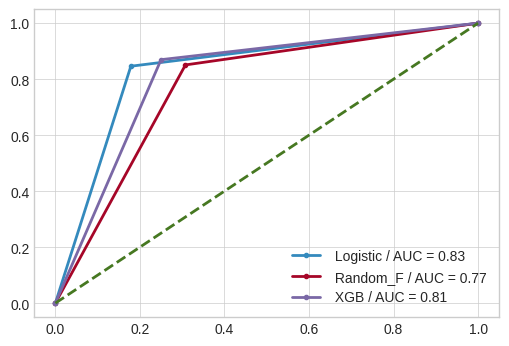

In [74]:
plt.figure(figsize=(6,4), dpi=100)

plt.plot(Log_Reg_fpr , Log_Reg_tpr , marker='.' , label = ' Logistic / AUC = %0.2f' % auc_Log_Reg ) 

plt.plot(Random_F_fpr , Random_F_tpr , marker='.' , label = ' Random_F / AUC = %0.2f' % auc_Random_F )

plt.plot(XGB_fpr , XGB_tpr , marker='.' , label = ' XGB / AUC = %0.2f' % auc_XGB ) 
plt.plot([0, 1], [0, 1],linestyle='--')
plt.style.use('seaborn-v0_8-whitegrid')
plt.legend(loc='lower right')
plt.show()